In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import ipdb

In [3]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [4]:
PATH = Path('data/pascal/')
list(PATH.iterdir())

[PosixPath('data/pascal/pascal_val2012.json'),
 PosixPath('data/pascal/pascal_train2012.json'),
 PosixPath('data/pascal/pascal_test2007.json'),
 PosixPath('data/pascal/pascal_train2007.json'),
 PosixPath('data/pascal/pascal_val2007.json'),
 PosixPath('data/pascal/VOCdevkit')]

In [5]:
trn_j = json.load((PATH/'pascal_train2007.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [6]:
IMAGES, ANNOTATIONS, CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

In [12]:
FILE_NAME,ID,IMAGE_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]: o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]: o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [8]:
IMG_PATH = PATH / 'VOCdevkit/VOC2007/JPEGImages'
list(IMG_PATH.iterdir())[:5]

[PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/005504.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/001055.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/007773.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/008820.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/004935.jpg')]

In [13]:
trn_anno = collections.defaultdict(lambda: [])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
        trn_anno[o[IMAGE_ID]].append((bb, o[CAT_ID]))

len(trn_anno)

2501

In [14]:
im0_d = trn_j[IMAGES][0]
im0_d

{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500}

In [17]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [18]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1],a[2]-a[0]])

In [26]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])


In [32]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

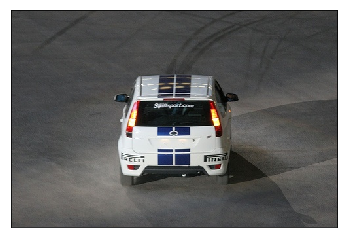

In [33]:
show_img(im)